### Solution 2

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
y_train.shape

170498071/170498071 [==============================] - 11s 0us/step


(50000, 1)

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

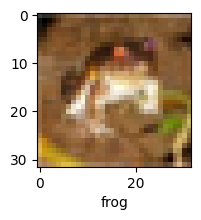

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
plot_sample(X_train, y_train, 0)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# Custom CNN with conv, sigmoid, pooling and fc layers:


In [ ]:
cnn = models.Sequential()
# Convolutional layers
cnn.add(layers.Conv2D(32, (3, 3), activation='sigmoid', input_shape=(32, 32, 3)))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
cnn.add(layers.MaxPooling2D((2, 2)))

# Flatten layer to transition from convolutional to fully connected layers
cnn.add(layers.Flatten())

# Fully connected layers
cnn.add(layers.Dense(64, activation='sigmoid'))
cnn.add(layers.Dense(10, activation='softmax'))  # Output layer with 10 classes

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 75s 47ms/step - loss: 2.0608 - accuracy: 0.2287
Epoch 2/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.7242 - accuracy: 0.3745
Epoch 3/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.5810 - accuracy: 0.4281
Epoch 4/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.4918 - accuracy: 0.4614
Epoch 5/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.4250 - accuracy: 0.4882
Epoch 6/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.3706 - accuracy: 0.5066
Epoch 7/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.3227 - accuracy: 0.5270
Epoch 8/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.2749 - accuracy: 0.5437
Epoch 9/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.2351 - accuracy: 0.5570
Epoch 10/10
1563/1563 [==============================] - 74s 47m

In [ ]:
cnn.evaluate(X_test,y_test)
y_pred = cnn.predict(X_test)

313/313 [==============================] - 4s 12ms/step


In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 1, 0, 4]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

'automobile'

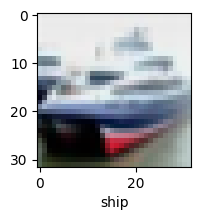

In [ ]:
plot_sample(X_test, y_test,1)
classes[y_classes[1]]

In [ ]:
test_loss_cnn, test_acc_cnn = cnn.evaluate(X_test, y_test)
print(f'CNN Model - Test accuracy: {test_acc_cnn * 100:.2f}%')

313/313 [==============================] - 5s 17ms/step - loss: 1.2347 - accuracy: 0.5596
CNN Model - Test accuracy: 55.96%


In [ ]:
from sklearn.metrics import classification_report
print("Classification report: \n", classification_report(y_test, y_classes))

Classification report: 
               precision    recall  f1-score   support

           0       0.67      0.58      0.63      1000
           1       0.75      0.60      0.67      1000
           2       0.46      0.41      0.43      1000
           3       0.40      0.41      0.40      1000
           4       0.56      0.41      0.47      1000
           5       0.46      0.55      0.50      1000
           6       0.70      0.59      0.64      1000
           7       0.52      0.71      0.60      1000
           8       0.70      0.60      0.64      1000
           9       0.52      0.74      0.61      1000

    accuracy                           0.56     10000
   macro avg       0.57      0.56      0.56     10000
weighted avg       0.57      0.56      0.56     10000



### CNN with ReLU Activation:

In [ ]:
# Define the modified CNN model with ReLU activation
model_relu = models.Sequential()

# Convolutional layers with ReLU activation
model_relu.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_relu.add(layers.MaxPooling2D((2, 2)))
model_relu.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_relu.add(layers.MaxPooling2D((2, 2)))
model_relu.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_relu.add(layers.MaxPooling2D((2, 2)))

# Flatten layer to transition from convolutional to fully connected layers
model_relu.add(layers.Flatten())

# Fully connected layers with ReLU activation
model_relu.add(layers.Dense(64, activation='relu'))
model_relu.add(layers.Dense(10, activation='softmax'))  # Output layer with 10 classes

# Compile the model
model_relu.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# Train the model
model_relu.fit(X_train, y_train, epochs=10)

# Evaluate the model on the test data
test_loss_relu, test_acc_relu = model_relu.evaluate(X_test, y_test)
print(f'ReLU Model - Test accuracy: {test_acc_relu * 100:.2f}%')

Epoch 1/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.5476 - accuracy: 0.4350
Epoch 2/10
1563/1563 [==============================] - 68s 44ms/step - loss: 1.1965 - accuracy: 0.5780
Epoch 3/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.0549 - accuracy: 0.6282
Epoch 4/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9614 - accuracy: 0.6634
Epoch 5/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8872 - accuracy: 0.6920
Epoch 6/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.8344 - accuracy: 0.7085
Epoch 7/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7886 - accuracy: 0.7236
Epoch 8/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7452 - accuracy: 0.7401
Epoch 9/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7111 - accuracy: 0.7498
Epoch 10/10
313/313 [==============================] - 4s 12ms/s

### 2(b). Test on additional_test_data (Sigmoid Activation):

In [ ]:
x_additional_test = np.load('/content/drive/MyDrive/dataset/test_additional.npy')
y_additional_test = np.load('/content/drive/MyDrive/dataset/labels.npy')
print(y_additional_test.shape)
print(x_additional_test.shape)
print(y_additional_test[:5])
x_additional_test = x_additional_test / 255.0

(10000,)
(10000, 32, 32, 3)
[3 8 8 0 6]


In [ ]:
additional_test_loss, additional_test_acc = cnn.evaluate(x_additional_test, y_additional_test)
print(f'Additional Test accuracy: {additional_test_acc}')

313/313 [==============================] - 5s 16ms/step - loss: 1.2570 - accuracy: 0.5508
Additional Test accuracy: 0.5508000254631042


In [ ]:
y_additional_pred = cnn.predict(x_additional_test)
y_additional_classes = [np.argmax(element) for element in y_additional_pred]
print("Classification report: \n", classification_report(y_additional_test, y_additional_classes))

313/313 [==============================] - 4s 12ms/step
Classification report: 
               precision    recall  f1-score   support

           0       0.66      0.57      0.61      1000
           1       0.74      0.60      0.67      1000
           2       0.44      0.39      0.41      1000
           3       0.39      0.37      0.38      1000
           4       0.58      0.40      0.47      1000
           5       0.46      0.56      0.50      1000
           6       0.66      0.59      0.62      1000
           7       0.51      0.71      0.60      1000
           8       0.68      0.58      0.62      1000
           9       0.51      0.75      0.61      1000

    accuracy                           0.55     10000
   macro avg       0.56      0.55      0.55     10000
weighted avg       0.56      0.55      0.55     10000



### Test on additional_test_data (ReLU Activation):

In [ ]:
additional_test_loss_Relu, additional_test_acc_Relu = model_relu.evaluate(x_additional_test, y_additional_test)
print(f'Additional Test accuracy: {additional_test_acc_Relu}')

313/313 [==============================] - 8s 25ms/step - loss: 1.1816 - accuracy: 0.6058
Additional Test accuracy: 0.6057999730110168


In [ ]:
y_additional_pred_Relu = model_relu.predict(x_additional_test)
y_additional_classes_Relu = [np.argmax(element) for element in y_additional_pred]
print("Classification report: \n", classification_report(y_additional_test, y_additional_classes_Relu))

313/313 [==============================] - 4s 12ms/step
Classification report: 
               precision    recall  f1-score   support

           0       0.66      0.57      0.61      1000
           1       0.74      0.60      0.67      1000
           2       0.44      0.39      0.41      1000
           3       0.39      0.37      0.38      1000
           4       0.58      0.40      0.47      1000
           5       0.46      0.56      0.50      1000
           6       0.66      0.59      0.62      1000
           7       0.51      0.71      0.60      1000
           8       0.68      0.58      0.62      1000
           9       0.51      0.75      0.61      1000

    accuracy                           0.55     10000
   macro avg       0.56      0.55      0.55     10000
weighted avg       0.56      0.55      0.55     10000

